# Sketching: Parametric sketching for gears

This example shows how to use gear sketching shapes from PyAnsys Geometry.

## Perform required imports and pre-sketching operations

Perform required imports and instantiate the ``Modeler`` instance and
the basic elements that define a sketch.

In [1]:
from pint import Quantity

from ansys.geometry.core import Modeler
from ansys.geometry.core.math import Plane, Point2D, Point3D
from ansys.geometry.core.misc import UNITS, Distance
from ansys.geometry.core.sketch import Sketch
from ansys.geometry.core.plotting import Plotter

# Start a modeler session
modeler = Modeler()

# Define the origin point of the plane
origin = Point3D([1, 1, 1])

# Create a plane containing the previous point with desired fundamental directions
plane = Plane(
    origin, direction_x=[1, 0, 0], direction_y=[0, -1, 1]
)


## Sketch a dummy gear

``DummyGear`` sketches are simple gears that have straight teeth. While they do not ensure
actual physical functionality, they might be useful for some simple playground tests.

Instantiate a new ``Sketch`` object and then define and plot a dummy gear.

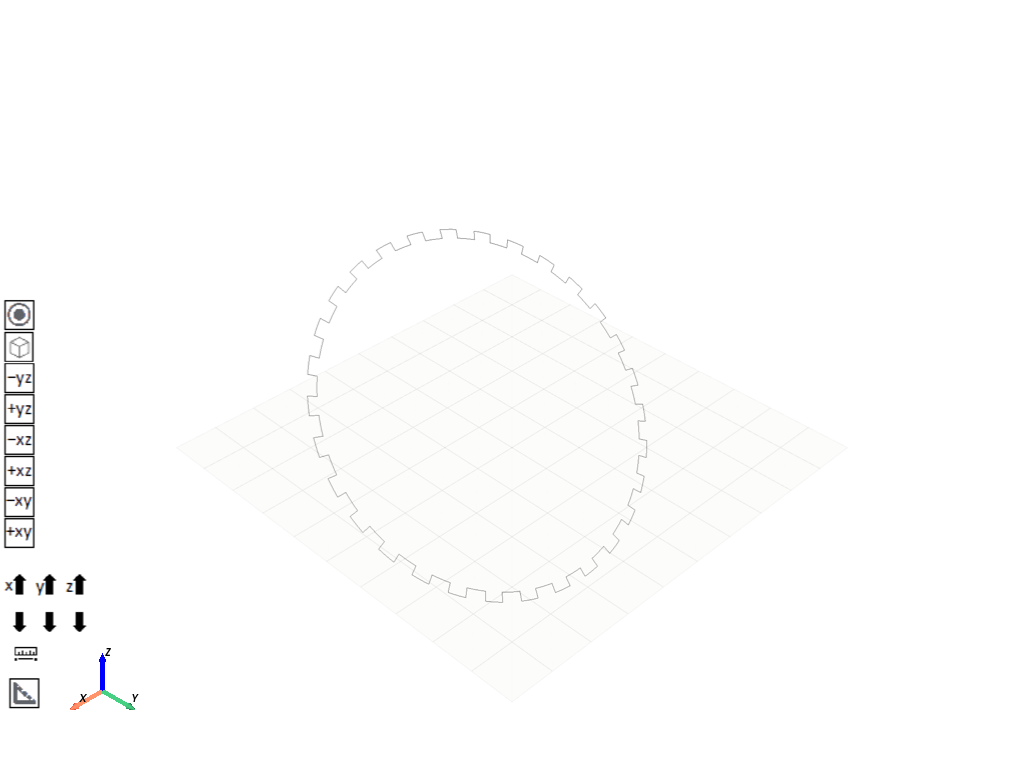

In [2]:
# Instantiate a new sketch object from previous plane
sketch = Sketch(plane)

# Define dummy gear
#
origin = Point2D([0, 1], unit=UNITS.meter)
outer_radius = Distance(4, unit=UNITS.meter)
inner_radius = Distance(3.8, unit=UNITS.meter)
n_teeth = 30
sketch.dummy_gear(origin, outer_radius, inner_radius, n_teeth)

# Plot dummy gear
sketch.plot()

After creating the sketch, extrudes it.

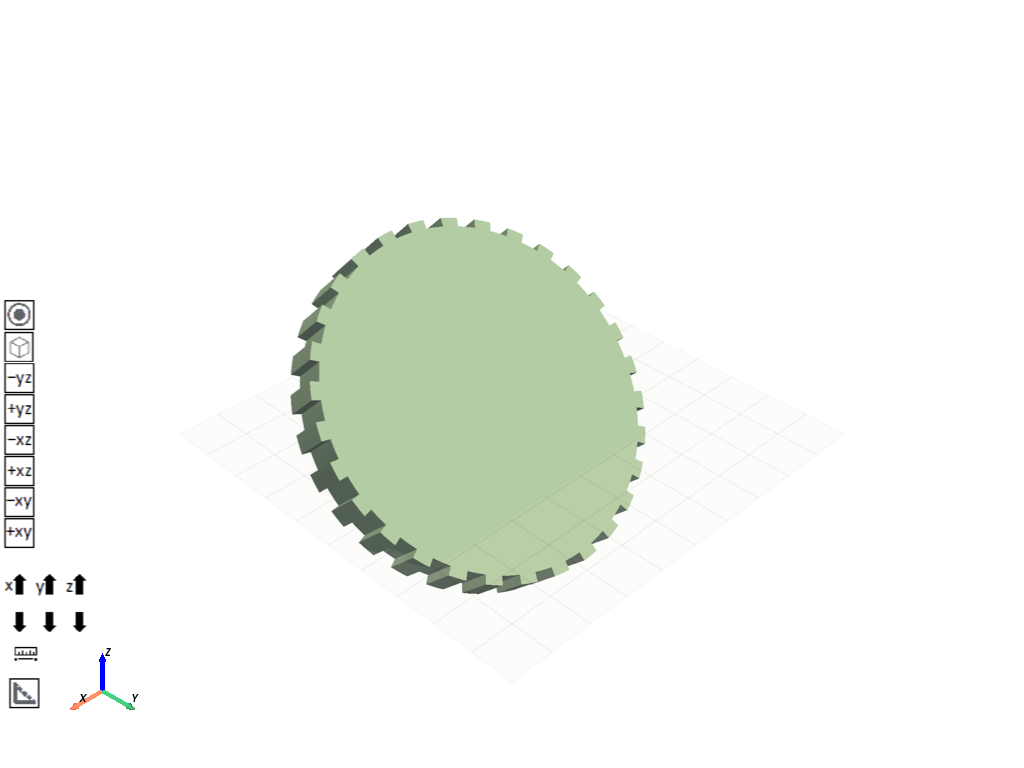

In [3]:
# Create a design
design = modeler.create_design("AdvancedFeatures_DummyGear")

# Extrude your sketch
dummy_gear = design.extrude_sketch("DummyGear", sketch, Distance(1000, UNITS.mm))

# Plot the design
design.plot()

## Sketch a spur gear

``SpurGear`` sketches are parametric CAD spur gears based on four parameters:

* ``origin``: Center point location for the desired spur gear. The value must
  be a ``Point2D`` object.
* ``module``: Ratio between the pitch circle diameter in millimeters and the
  number of teeth. This is a common parameter for spur gears. The value should
  be an integer or a float.
* ``pressure_angle``: Pressure angle expected for the teeth of the spur gear.
  This is also a common parameter for spur gears. The value must be a
  ``pint.Quantity`` object.
* ``n_teeth``: Number of teeth. The value must be an integer.

Instantiate a new ``Sketch`` object and then define and plot a spur gear.

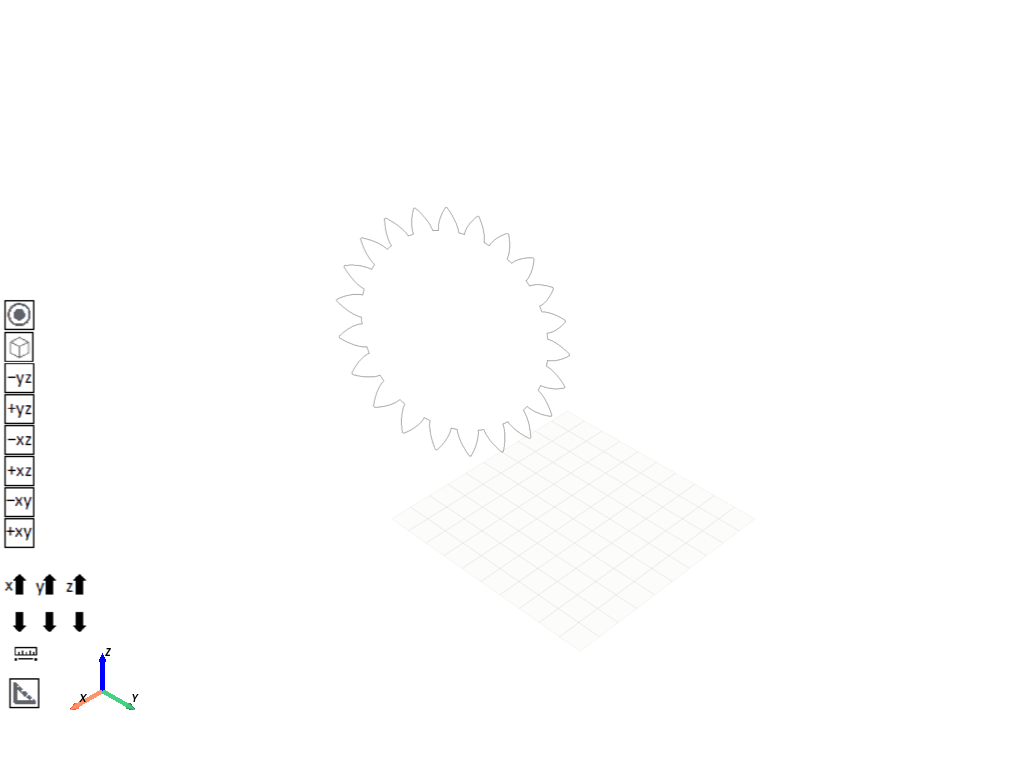

In [4]:
# Instantiate a new sketch object from previous plane
sketch = Sketch(plane)

# Define spur gear
#
origin = Point2D([0, 1], unit=UNITS.meter)
module = 40
pressure_angle = Quantity(20, UNITS.deg)
n_teeth = 22

# Sketch spur gear
sketch.spur_gear(origin, module, pressure_angle, n_teeth)

# Plot spur gear
sketch.plot()

After creating the sketch, extrude it.

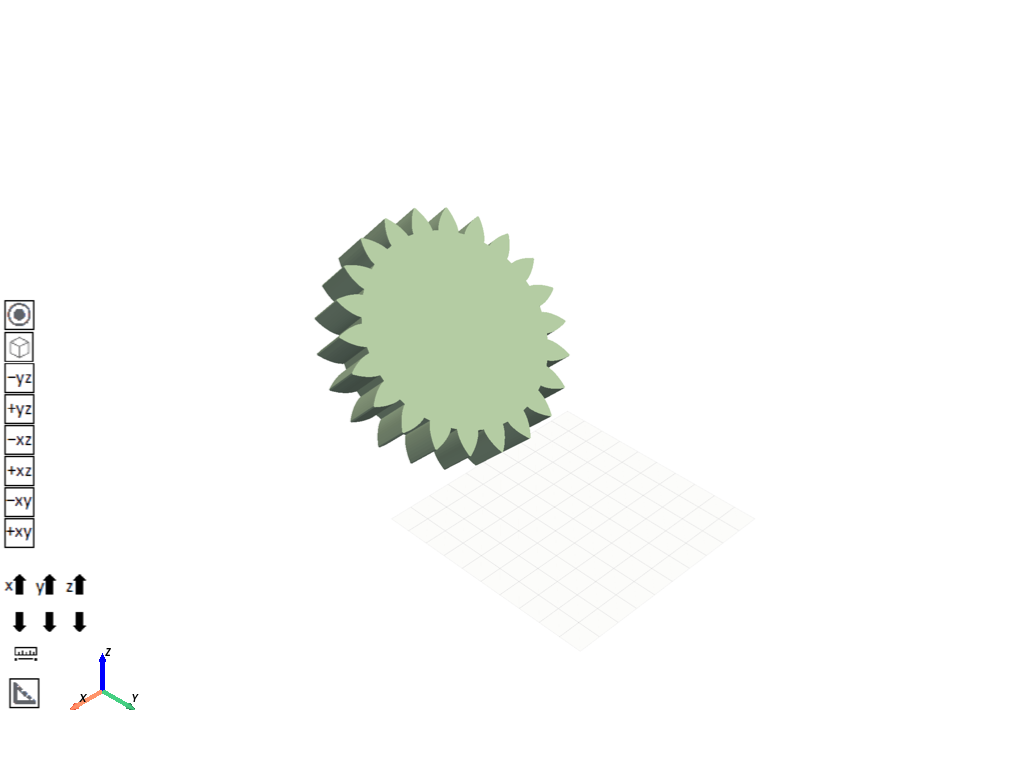

In [5]:
# Create a design
design = modeler.create_design("AdvancedFeatures_SpurGear")

# Extrude sketch
dummy_gear = design.extrude_sketch("SpurGear", sketch, Distance(200, UNITS.mm))

# Plot design
design.plot()